# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# DO NOT RERUN IF YOU'VE ALREADY PULLED THE DATA

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
# DO NOT RERUN IF YOU'VE ALREADY PULLED THE DATA
# IT IS STORED IN THE CSV

# Initialize lists to hold data to be appended as we loop through 'weather_json'
wd_city, wd_lat, wd_lng, wd_max_temp, wd_humidity, wd_cloudiness, wd_wind_speed, wd_country, wd_date = ([] for i in range(9))

for city in cities:
    query_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"
    response = requests.get(query_url).json()
    try:
        wd_city.append(response["name"])
        wd_lat.append(response["coord"]["lat"])
        wd_lng.append(response["coord"]["lon"])
        wd_max_temp.append(response["main"]["temp_max"])
        wd_humidity.append(response["main"]["humidity"])
        wd_cloudiness.append(response["clouds"]["all"])
        wd_wind_speed.append(response["wind"]["speed"])
        wd_country.append(response["sys"]["country"])
        wd_date.append(response["dt"])
        
        print(f"City: {response['name']} ID: {response['id']}")
    
    except (KeyError, NameError):
        print("City info not found.")

City: Kaitangata ID: 2208248
City: Staryy Nadym ID: 1490918
City: Merritt ID: 6072350
City: Lavrentiya ID: 4031637
City: Hobart ID: 2163355
City: Rikitea ID: 4030556
City: Arraial do Cabo ID: 3471451
City: Avarua ID: 4035715
City: Tuktoyaktuk ID: 6170031
City: Faanui ID: 4034551
City: Tiksi ID: 2015306
City: Kapaa ID: 5848280
City: Norman Wells ID: 6089245
City: Agadez ID: 2448083
City: Port Elizabeth ID: 964420
City: Mossamedes ID: 3347019
City info not found.
City: Albany ID: 5106841
City: Athabasca ID: 5887916
City: Banda Aceh ID: 1215502
City: Pontianak ID: 1630789
City: New Norfolk ID: 2155415
City info not found.
City: Thompson ID: 6165406
City: Nanortalik ID: 3421765
City: Zhukovo ID: 462792
City: Kavieng ID: 2094342
City: Redmond ID: 5808079
City: Hermanus ID: 3366880
City: Sabang ID: 1214026
City: Ushuaia ID: 3833367
City: Saint-François ID: 2980080
City: Eyl ID: 60019
City info not found.
City: Porto-Novo ID: 2392087
City: Dingle ID: 1714733
City info not found.
City: Port Au

City: Baykit ID: 1510689
City: São José da Coroa Grande ID: 3388456
City: Kristianstad ID: 2699310
City: Shenjiamen ID: 1795632
City: Cherskiy ID: 2126199
City: Shelburne ID: 6145890
City: Biltine ID: 244878
City info not found.
City: Nsunga ID: 151363
City: Tilichiki ID: 2120591
City: Christchurch ID: 2192362
City: Uvira ID: 204405
City: Fairbanks ID: 5861897
City: Shiloh ID: 4249910
City: Algeciras ID: 2522013
City info not found.
City: São Miguel do Araguaia ID: 3448455
City: Sungai Raya ID: 1625908
City: Zabid ID: 69500
City: Longyearbyen ID: 2729907
City: Sidi Ali ID: 2487130
City: Pisco ID: 3932145
City: Nouadhibou ID: 2377457
City info not found.
City: Dubbo ID: 2168305
City: Geraldton ID: 2070998
City: Kununurra ID: 2068110
City: Coyhaique ID: 3894426
City: Tiznit Province ID: 2527087
City: Seoul ID: 1835848
City: Guerrero Negro ID: 4021858
City: Rota ID: 2511700
City: Muborak ID: 1216475
City: Japura ID: 1642773
City: Leh ID: 1264976
City: Port Blair ID: 1259385
City: Yar-Sale

City: Shulan ID: 2034761
City: Māngrol ID: 1263752
City: Challans ID: 3027513
City: Snåase ID: 3138076
City: Gizo Government Station ID: 2108857
City: Diapaga ID: 2361373
City: Walla Walla ID: 5814916
City info not found.
City: Sungai Penuh ID: 1625929
City: Ledyard Center ID: 4837648
City: Lukulu ID: 909488
City: Iğdır ID: 311665
City: Obo ID: 236950
City: Bougouni ID: 2459775
City: Remontnoye ID: 502185
City info not found.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# DO NOT RERUN IF YOU'VE ALREADY PULLED THE DATA
# IT IS STORED IN THE CSV

w_df = pd.DataFrame({
    "City" : wd_city
    ,"Lat" : wd_lat
    ,"Lng" : wd_lng
    ,"Max Temp" : wd_max_temp
    ,"Humidity" : wd_humidity
    ,"Cloudiness" : wd_cloudiness
    ,"Wind Speed" : wd_wind_speed
    ,"Country" : wd_country
    ,"Date" : wd_date
})

w_df.to_csv(output_data_file, index = False)

In [6]:
# Read in the saved instance from the csv
weather_df = pd.read_csv(output_data_file, encoding = 'utf-8')

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,49.64,94,85,7.63,NZ,1618316230
1,Staryy Nadym,65.6118,72.6842,32.41,79,65,18.48,RU,1618316230
2,Merritt,50.1123,-120.7942,28.40,86,1,2.30,CA,1618316230
3,Lavrentiya,65.5833,-171.0000,18.82,95,100,11.25,RU,1618316231
4,Hobart,-42.8794,147.3294,55.40,82,90,11.50,AU,1618316231


In [7]:
weather_summ = weather_df.describe()

weather_summ

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.00000,5.650000e+02
mean,20.625326,13.168719,60.259239,68.138053,54.281416,8.50623,1.618316e+09
std,33.401007,89.892009,23.446805,23.610959,37.427572,5.67590,1.032858e+02
min,-54.800000,-175.200000,-19.300000,3.000000,0.000000,0.20000,1.618315e+09
25%,-8.145000,-64.900000,46.000000,55.000000,20.000000,4.29000,1.618316e+09
50%,27.506400,18.423200,64.170000,74.000000,65.000000,6.91000,1.618316e+09
75%,48.390300,82.448400,78.800000,86.000000,90.000000,11.50000,1.618316e+09
max,78.218600,179.316700,107.370000,100.000000,100.000000,37.87000,1.618316e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# There are no cities with a humidity greater than 100%.
# This can be observed as the max for Humidity is 100 in 'weather_summ'.
# Additionally, we will determine this filtering out Humidity levels over 100% and generating a new summary table
clean_weather_df = weather_df.loc[weather_df["Humidity"] <= 100, :]

clean_weather_df.describe()

# Since this data can be generated for cases that satisfy this condition, we will only use clean_weather_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.00000,5.650000e+02
mean,20.625326,13.168719,60.259239,68.138053,54.281416,8.50623,1.618316e+09
std,33.401007,89.892009,23.446805,23.610959,37.427572,5.67590,1.032858e+02
min,-54.800000,-175.200000,-19.300000,3.000000,0.000000,0.20000,1.618315e+09
25%,-8.145000,-64.900000,46.000000,55.000000,20.000000,4.29000,1.618316e+09
50%,27.506400,18.423200,64.170000,74.000000,65.000000,6.91000,1.618316e+09
75%,48.390300,82.448400,78.800000,86.000000,90.000000,11.50000,1.618316e+09
max,78.218600,179.316700,107.370000,100.000000,100.000000,37.87000,1.618316e+09


In [9]:
# We will also regenarate the summary table to avoid future discrepancies

clean_weather_summ = clean_weather_df.describe()

clean_weather_summ

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.00000,5.650000e+02
mean,20.625326,13.168719,60.259239,68.138053,54.281416,8.50623,1.618316e+09
std,33.401007,89.892009,23.446805,23.610959,37.427572,5.67590,1.032858e+02
min,-54.800000,-175.200000,-19.300000,3.000000,0.000000,0.20000,1.618315e+09
25%,-8.145000,-64.900000,46.000000,55.000000,20.000000,4.29000,1.618316e+09
50%,27.506400,18.423200,64.170000,74.000000,65.000000,6.91000,1.618316e+09
75%,48.390300,82.448400,78.800000,86.000000,90.000000,11.50000,1.618316e+09
max,78.218600,179.316700,107.370000,100.000000,100.000000,37.87000,1.618316e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

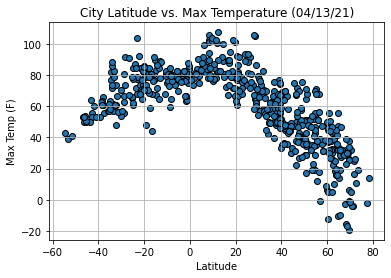

In [10]:
plt.scatter(clean_weather_df["Lat"], clean_weather_df["Max Temp"], edgecolors = "black")
plt.title("City Latitude vs. Max Temperature (04/13/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.show();

## Latitude vs. Humidity Plot

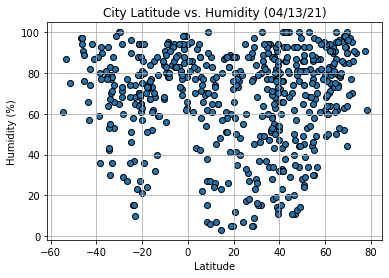

In [11]:
plt.scatter(clean_weather_df["Lat"], clean_weather_df["Humidity"], edgecolors = "black")
plt.title("City Latitude vs. Humidity (04/13/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show();

## Latitude vs. Cloudiness Plot

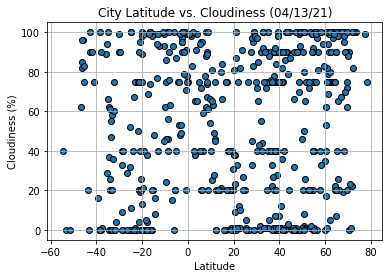

In [12]:
plt.scatter(clean_weather_df["Lat"], clean_weather_df["Cloudiness"], edgecolors = "black")
plt.title("City Latitude vs. Cloudiness (04/13/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show();

## Latitude vs. Wind Speed Plot

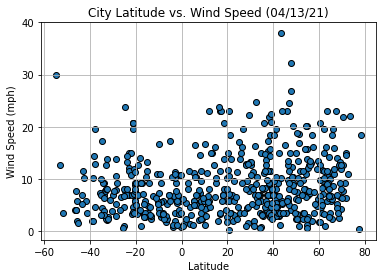

In [14]:
plt.scatter(clean_weather_df["Lat"], clean_weather_df["Wind Speed"], edgecolors = "black")
plt.title("City Latitude vs. Wind Speed (04/13/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.yticks([0, 10, 20, 30, 40])
plt.grid()
plt.show();

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


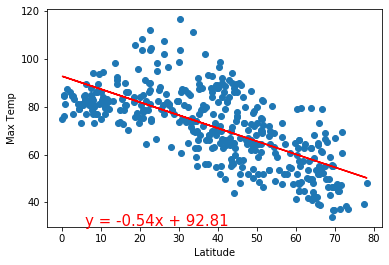

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


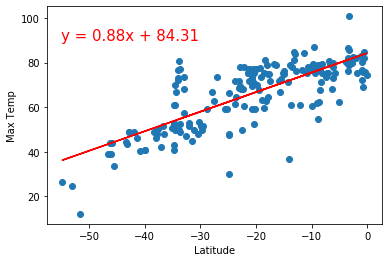

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


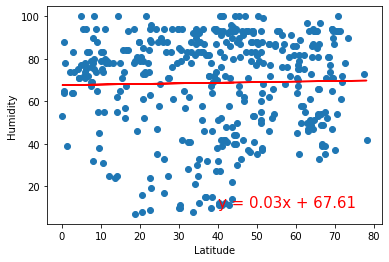

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


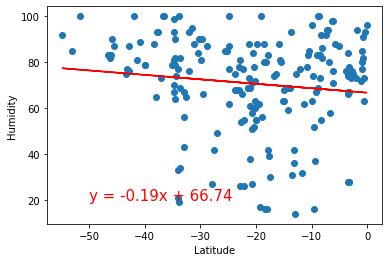

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


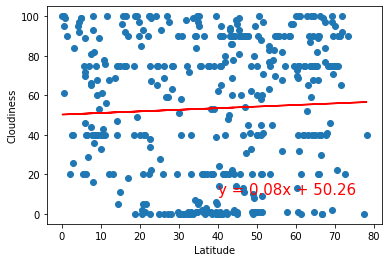

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


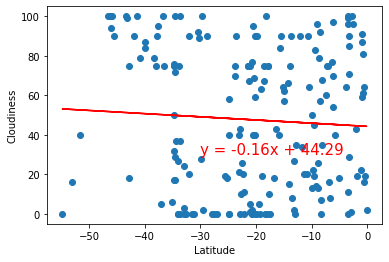

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


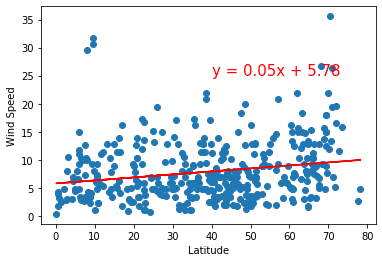

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


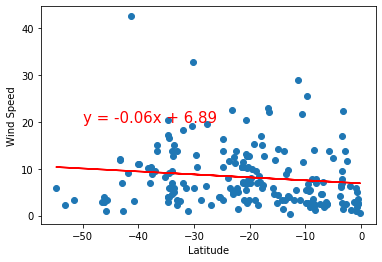